1D example

This illustrates the generation of points of computations in the variable x and furthermore the computations of the probability density function values in the vector p

In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
from pdffuns import *

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last" # all | last | last_expr | none 

In [4]:
x=np.arange(-10,10.5,0.5).reshape(-1,1)
my=1
Sgm=2
p=norm1D(my,Sgm,x)



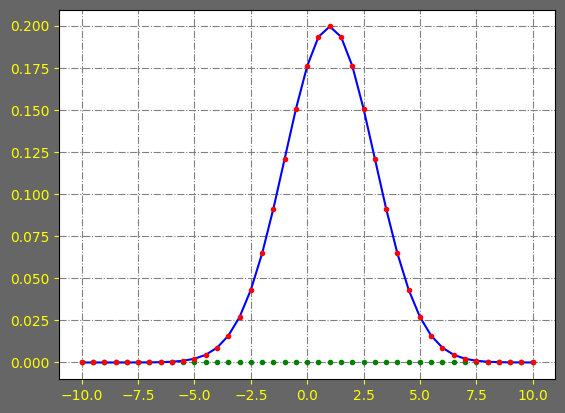

In [5]:
fc=np.array([1,1,1])*0.4
fig, ax=plt.subplots(1,1)
fig.set_facecolor(fc)
ax.plot(x,x*0,'g.')
ax.plot(x,p,'b')
ax.plot(x,p,'r.')
ax.grid(color='gray',linestyle='-.')
ax.tick_params(colors='yellow')
plt.show()

2D SOLUTION

In [6]:
def norm2D(my, covmat, X):
    
    # Initialization
    [n,d,_] = np.shape(X)
    p = np.zeros((np.shape(X)[0], np.shape(X)[1]))
    
    # Do some precomputations to not get confused
    inv_cm = np.linalg.inv(covmat) # Inverse of the covariance matrix
    det_cm = np.linalg.det(covmat) # Determinant of the covariance matrix
    
    for i in range(n):
        for j in range(d):
        
            x = np.array(X[i,j,:]).reshape(-1, 1)
            
            norm_const = 1.0/(2*np.pi*np.sqrt(det_cm))
            exp = np.matmul(np.transpose((x - my)), inv_cm)
            exp = -(1/2)*np.matmul(exp, (x - my))

            p[i, j] = norm_const * np.exp(exp)
        
    return p

In [11]:
x1 = np.arange(-10,10.5,0.5).reshape(-1,1)
x2 = np.arange(-9,10.5,0.5).reshape(-1,1)

# Get coordinates grid
X1, X2 = np.meshgrid(x1, x2)

# Pack everything
X = np.dstack((X1, X2))

# Define the mean and the covariance matrix
my = np.array([[1],[1]])
covmat = np.array([[5,3],[3,5]])

p = norm2D(my,covmat,X)

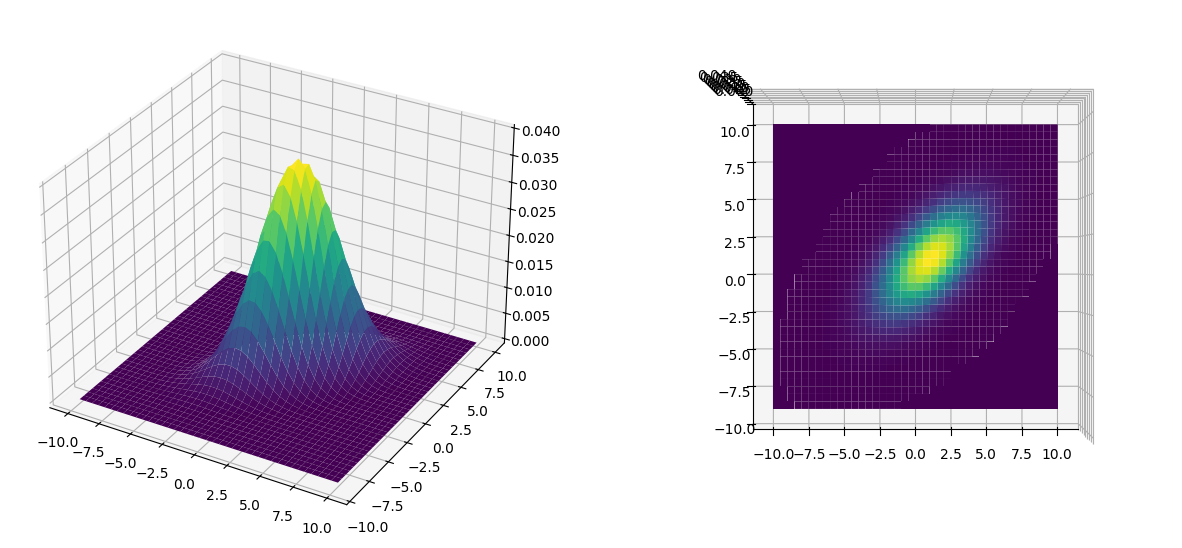

In [12]:
# Plot the results
fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X1, X2, p, rstride=1, cstride=1, linewidth=1, antialiased=True,
                cmap=cm.viridis)

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(X1, X2, p, rstride=1, cstride=1, linewidth=1, antialiased=True,
                cmap=cm.viridis)

ax2.view_init(90, 270)


plt.show()